# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import math
import seaborn as sns

## Load data

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Investigate and Prepare Data

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
display(plans.tail())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


There is a column designated for usd_per_gb but not not the amount of gigabytes that are included in the plan. May cause confusion, I would make a seperate column designates for gb_per_month_included to help. 

## Fix data

plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024
display(plans.head())

In [5]:
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024
display(plans.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [7]:
# Print the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Print a sample of data for users
display(users)
users.isna().sum()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Looking at the data I was initially concerned about the Non-Null values but looks like there are some applicable dates, with 500 listed and there are 466 Non-Null values out of the 500 rows. This information may be important later so will not modify this at this time.
Only other note would be the dates for the reg_date and churn_date should be changed to datetime objects from its current objects status.

## Fix Data

[Fix obvious issues with the data given the initial observations.]

In [9]:
# Convert reg_date to datetime format
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


## Enrich Data

## Calls

In [10]:
# Print the general/summary information about the calls' DataFrame
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Print a sample of data for calls
display(calls.sample(n = 10, replace = True))


,id,user_id,call_date,duration
21069,1077_1036,1077,2018-01-23,17.56
103547,1365_743,1365,2018-10-23,8.82
131598,1472_685,1472,2018-09-11,9.51
48404,1174_381,1174,2018-08-05,5.17
5039,1022_305,1022,2018-08-12,0.00
116576,1408_225,1408,2018-09-02,2.17
107714,1382_461,1382,2018-11-09,16.87
37025,1140_309,1140,2018-07-17,11.30
78734,1281_495,1281,2018-11-04,7.32
106651,1377_203,1377,2018-12-27,4.25


Did not notice any missing values. The call_date values should be modified to datetime data type. It appears that the dates are randomized and not in order, having it organized will help keep data more organized. 

## Fix data

In [12]:
# Converting call_date to datetime format
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
# Pull month of the call data to a new column
calls['month'] = calls['call_date'].dt.month_name()

## Enrich data

To keep data more streamlined I would think keeping the "duration" column rounded to whole numbers to ensure clear visualization.
Later on we need to look at data in a monthly time frame. By making a column for the month to help track minutes per month.

In [13]:
# Rounding the values in the 'duration' column to the next highest whole number.
calls['duration'] = np.ceil(calls['duration'])
display(calls.head(10))
# Want to get rid of decimal place in the "duration" column, make the data type to integer to reduce confusion.
calls['duration'] = calls['duration'].astype('int')
calls.head(10)
# Pull month of the call data to a new column
calls['month'] = calls['call_date'].dt.month_name()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,December
1,1000_145,1000,2018-12-27,14.0,December
2,1000_247,1000,2018-12-27,15.0,December
3,1000_309,1000,2018-12-28,6.0,December
4,1000_380,1000,2018-12-30,5.0,December
5,1000_388,1000,2018-12-31,3.0,December
6,1000_510,1000,2018-12-27,6.0,December
7,1000_521,1000,2018-12-28,15.0,December
8,1000_530,1000,2018-12-28,6.0,December
9,1000_544,1000,2018-12-26,5.0,December


## Messages

In [14]:
# Print the general/summary information about the messages' DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
# Print a sample of data for messages
display(messages.sample( n =5))


,id,user_id,message_date
52481,1336_474,1336,2018-09-19
35826,1236_97,1236,2018-08-07
40519,1261_162,1261,2018-07-04
72944,1470_572,1470,2018-12-13
19901,1126_814,1126,2018-08-23


The message_date column values are strings and should be changed to datetime data type, to keep uniformity. 

## Fix data

[Fix obvious issues with the data given the initial observations.]

In [16]:
# Change message_date to datetime format
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
display(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


None

## Enrich data

Would make a column for month so that the messages can stored, to be able to look up later.

In [17]:
# Add month column for message_date
messages['month'] = messages['message_date'].dt.month_name()
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.3+ MB


## Internet

In [18]:
# Print the general/summary information about the internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
# Print a sample of data for the internet traffic
internet.sample(n = 10)

,id,user_id,session_date,mb_used
84282,1392_250,1392,2018-09-17,363.50
44499,1196_514,1196,2018-08-30,732.54
36099,1163_80,1163,2018-11-30,214.83
43080,1191_259,1191,2018-05-16,31.08
90333,1416_63,1416,2018-11-08,819.59
98461,1465_406,1465,2018-09-15,0.00
47297,1211_174,1211,2018-08-24,608.58
31920,1145_56,1145,2018-08-27,178.63
64333,1295_250,1295,2018-09-30,66.42
28181,1128_335,1128,2018-12-24,415.25


Only issue that I see is the session_date column should be changed to the datetime data type that has been previously done.

## Fix data

In [20]:
# Change session_date to datetime format
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

## Enrich data

In [21]:
# Add month column for session_date
internet['month'] = internet['session_date'].dt.month_name()

## Study plan conditions

In [22]:
# Print out the plan conditions and make sure they are clear for you
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [23]:
# Calculate the number of calls made by each user per month. Save the result.
calls_per_month = calls.groupby(['user_id', 'month'])['duration'].count().reset_index()
display(calls_per_month.head())


,user_id,month,duration
0,1000,December,16
1,1001,August,27
2,1001,December,56
3,1001,November,64
4,1001,October,65


In [24]:
# Calculate the amount of minutes spent by each user per month. This is made easier due to rounding up the minutes earlier. Save the result.
# Results will be stored in minutes_per_month variable
minutes_per_month = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
display(minutes_per_month.head())

,user_id,month,duration
0,1000,December,124
1,1001,August,182
2,1001,December,412
3,1001,November,426
4,1001,October,393


In [25]:
# Calculate the number of messages sent by each user per month. Save the result.
# Stored in message_per_month
messages_per_month = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
display(messages_per_month.head())

,user_id,month,id
0,1000,December,11
1,1001,August,30
2,1001,December,44
3,1001,November,36
4,1001,October,53


In [26]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
# Info saved to internet_per_month variable
internet_per_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
display(internet_per_month.head(10))



,user_id,month,mb_used
0,1000,December,1901.47
1,1001,August,6919.15
2,1001,December,19369.18
3,1001,November,18504.30
4,1001,October,22330.49
5,1001,September,13314.82
6,1002,December,14396.24
7,1002,November,19345.08
8,1002,October,6552.01
9,1003,December,27044.14


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [27]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merged_data = calls_per_month.merge(right=minutes_per_month, on = ['user_id', 'month'], how = 'outer')
merged_data = merged_data.merge(right=messages_per_month, on = ['user_id', 'month'], how = 'outer')
merged_data = merged_data.merge(right=internet_per_month, on = ['user_id', 'month'], how = 'outer')

# Fill the NaN values with 0
merged_data = merged_data.fillna(0)

# rename the columns
merged_data.columns = ['user_id', 'month', 'calls', 'minutes', 'messages', 'mb_used']

# reset the index
merged_data = merged_data.reset_index(drop = True)

# display the merged data
display(merged_data.head(10))


,user_id,month,calls,minutes,messages,mb_used
0,1000,December,16.0,124.0,11.0,1901.47
1,1001,August,27.0,182.0,30.0,6919.15
2,1001,December,56.0,412.0,44.0,19369.18
3,1001,November,64.0,426.0,36.0,18504.30
4,1001,October,65.0,393.0,53.0,22330.49
5,1001,September,49.0,315.0,44.0,13314.82
6,1002,December,47.0,384.0,41.0,14396.24
7,1002,November,55.0,386.0,32.0,19345.08
8,1002,October,11.0,59.0,15.0,6552.01
9,1003,December,149.0,1104.0,50.0,27044.14


In [28]:
# Add the plan information
plan_info = users[['user_id', 'plan']]
plan_info.columns = ['user_id', 'plan_name']

merged_data = merged_data.merge(right=plan_info, on = 'user_id')

# Merge the plan data to the merged data
merged_data = merged_data.merge(right=plans, on = 'plan_name')

# sort the data by user_id
merged_data = merged_data.sort_values(by='user_id').reset_index(drop = True)

# display the merged data
display(merged_data.head(20))

,user_id,month,calls,minutes,messages,mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,December,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
1,1001,October,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,15.0
2,1001,September,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,15.0
3,1001,November,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,15.0
4,1001,August,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,15.0
5,1001,December,56.0,412.0,44.0,19369.18,surf,50,15360,500,20,10,0.03,0.03,15.0
6,1002,October,11.0,59.0,15.0,6552.01,surf,50,15360,500,20,10,0.03,0.03,15.0
7,1002,November,55.0,386.0,32.0,19345.08,surf,50,15360,500,20,10,0.03,0.03,15.0
8,1002,December,47.0,384.0,41.0,14396.24,surf,50,15360,500,20,10,0.03,0.03,15.0
9,1003,December,149.0,1104.0,50.0,27044.14,surf,50,15360,500,20,10,0.03,0.03,15.0


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [29]:
# Calculate the monthly revenue for each user
def calc_revenue(row):
    """Function to calculate the monthly revenue for each user"""
    # User's usage
    minutes = row['minutes']
    messages = row['messages']
    # for internet usage, change from megabytes to gigabytes and round up to the next highest whole gigabyte
    internet = math.ceil(row['mb_used'] * (2**(-10)))
    
    # Plan limits
    minutes_limit = row['minutes_included']
    messages_limit = row['messages_included']
    # for internet usage, change from megabytes to gigabytes
    internet_limit = row['mb_per_month_included'] * (2**(-10))
    
    # Fee rates
    monthly_rate = row['usd_monthly_pay']
    minute_rate = row['usd_per_minute']
    message_rate = row['usd_per_message']
    internet_rate = row['usd_per_gb']
    
    # Initialize the revenue values and assign them to 0
    minutes_revenue = 0
    messages_revenue = 0
    internet_revenue = 0
    
    # Calculating overuse and total revenue
    if minutes > minutes_limit:
        minutes_revenue = (minutes - minutes_limit) * minute_rate
    if messages > messages_limit:
        messages_revenue = (messages - messages_limit) * message_rate
    if internet > internet_limit:
        internet_revenue = (internet - internet_limit) * internet_rate
        
    revenue = monthly_rate + minutes_revenue + messages_revenue + internet_revenue
    
    return revenue


In [30]:
# Test For Calc_Revenue
test_rows = merged_data.loc[:10]
display(test_rows.apply(calc_revenue, axis = 1))

0      70.00
1      90.09
2      20.00
3      60.00
4      20.00
5      60.00
6      20.00
7      60.00
8      20.00
9     158.12
10     90.00
dtype: float64

In [31]:
# Add the Revenue function to merged data
merged_data['revenue'] = merged_data.apply(calc_revenue, axis = 1)
display(merged_data.head(10))

,user_id,month,calls,minutes,messages,mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,revenue
0,1000,December,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.00
1,1001,October,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,15.0,90.09
2,1001,September,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
3,1001,November,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
4,1001,August,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
5,1001,December,56.0,412.0,44.0,19369.18,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
6,1002,October,11.0,59.0,15.0,6552.01,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
7,1002,November,55.0,386.0,32.0,19345.08,surf,50,15360,500,20,10,0.03,0.03,15.0,60.00
8,1002,December,47.0,384.0,41.0,14396.24,surf,50,15360,500,20,10,0.03,0.03,15.0,20.00
9,1003,December,149.0,1104.0,50.0,27044.14,surf,50,15360,500,20,10,0.03,0.03,15.0,158.12


## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

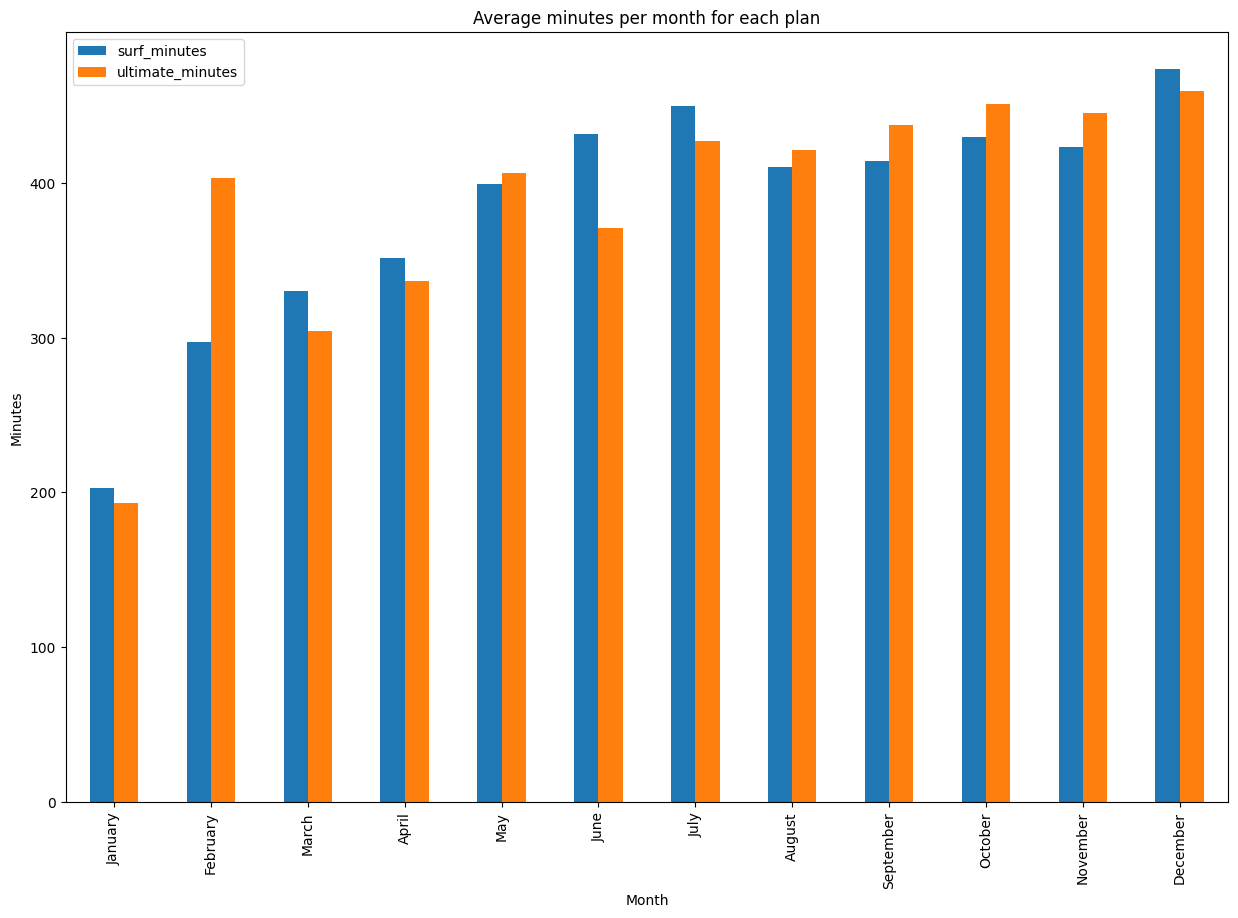

In [32]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

# Get the data for the surf plan and plot the bar plot
surf_data = merged_data[merged_data['plan_name'] == 'surf']
surf_data = surf_data.groupby('month')['minutes'].mean().reset_index()
surf_data.columns = ['month', 'surf_minutes']

# Get the data for the ultimate plan and plot the bar plot
ultimate_data = merged_data[merged_data['plan_name'] == 'ultimate']
ultimate_data = ultimate_data.groupby('month')['minutes'].mean().reset_index()
ultimate_data.columns = ['month', 'ultimate_minutes']

# Merge data
merged_calls = surf_data.merge(right=ultimate_data, on = 'month', how = 'outer')

# sorting the index by the chronologically order of months
merged_calls.index = pd.CategoricalIndex(merged_calls['month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
merged_calls = merged_calls.sort_index()



# Plot the bar plot
merged_calls.plot(x = 'month', y = ['surf_minutes', 'ultimate_minutes'], kind = 'bar', figsize = (15, 10))
plt.title('Average minutes per month for each plan')
plt.xlabel('Month')
plt.ylabel('Minutes')
plt.show()


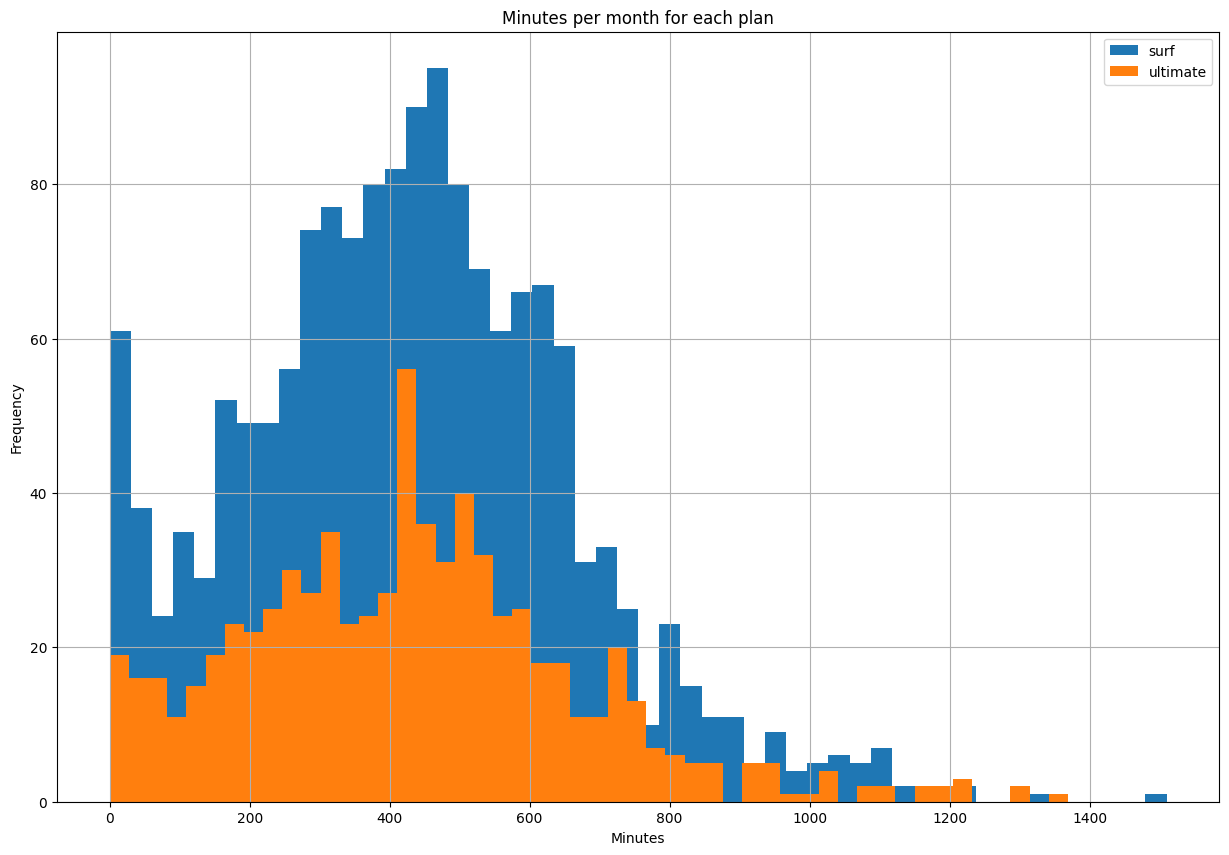

In [33]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

# Acquire the data for the surf plan and plot the histogram
surf_data = merged_data[merged_data['plan_name'] == 'surf']['minutes'].hist(bins=50, figsize = (15, 10), label = 'surf')

# Acquire the data for the ultimate plan and plot the histogram
ultimate_data = merged_data[merged_data['plan_name'] == 'ultimate']['minutes'].hist(bins=50, figsize = (15, 10), label = 'ultimate')

# Setting the title and labels
plt.title('Minutes per month for each plan')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.legend()
plt.show()


[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [34]:
# Calculate the mean and the variance of the monthly call duration

# Get the data for the surf plan
surf_data_calls = merged_data[merged_data['plan_name'] == 'surf'].groupby('user_id')['minutes'].mean()

# Get the data for the ultimate plan
ultimate_data_calls = merged_data[merged_data['plan_name'] == 'ultimate'].groupby('user_id')['minutes'].mean()

# Calculate the mean, variance, and standard deviation for the surf plan
surf_mean_calls = surf_data_calls.mean()
surf_var_calls = surf_data_calls.var()
surf_std_calls = np.std(surf_data_calls)

# Calculate the mean, variance, and standard deviation for the ultimate plan
ultimate_mean_calls = ultimate_data_calls.mean()
ultimate_var_calls = ultimate_data_calls.var()
ultimate_std_calls = np.std(ultimate_data_calls)

# Print the results
print(f'Mean for the surf plan: {round(surf_mean_calls,2)}')
print(f'Variance for the surf plan: {round(surf_var_calls,2)}')
print(f'Standard deviation for the surf plan: {round(surf_std_calls,2)}')
print(f'Mean for the ultimate plan: {round(ultimate_mean_calls,2)}')
print(f'Variance for the ultimate plan: {round(ultimate_var_calls,2)}')
print(f'Standard deviation for the ultimate plan: {round(ultimate_std_calls,2)}')


Mean for the surf plan: 408.74
Variance for the surf plan: 39748.06
Standard deviation for the surf plan: 199.07
Mean for the ultimate plan: 407.96
Variance for the ultimate plan: 40142.98
Standard deviation for the ultimate plan: 199.72


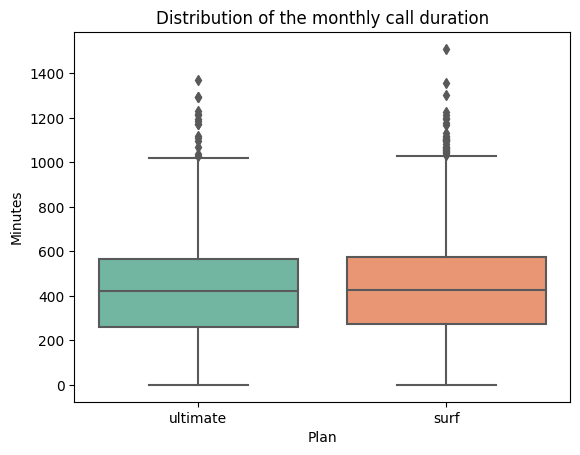

In [35]:
# Plot a boxplot to visualize the distribution of the monthly call duration
sns.boxplot(x = 'plan_name', y = 'minutes', data = merged_data, palette = 'Set2',)
plt.title('Distribution of the monthly call duration')
plt.xlabel('Plan')
plt.ylabel('Minutes')
plt.show()


The boxplots look very similiar. this helps to back up the calculations for the mean and standard deviations earlier. Clients from both plans seem to average 420 minutes call usage.

### Messages

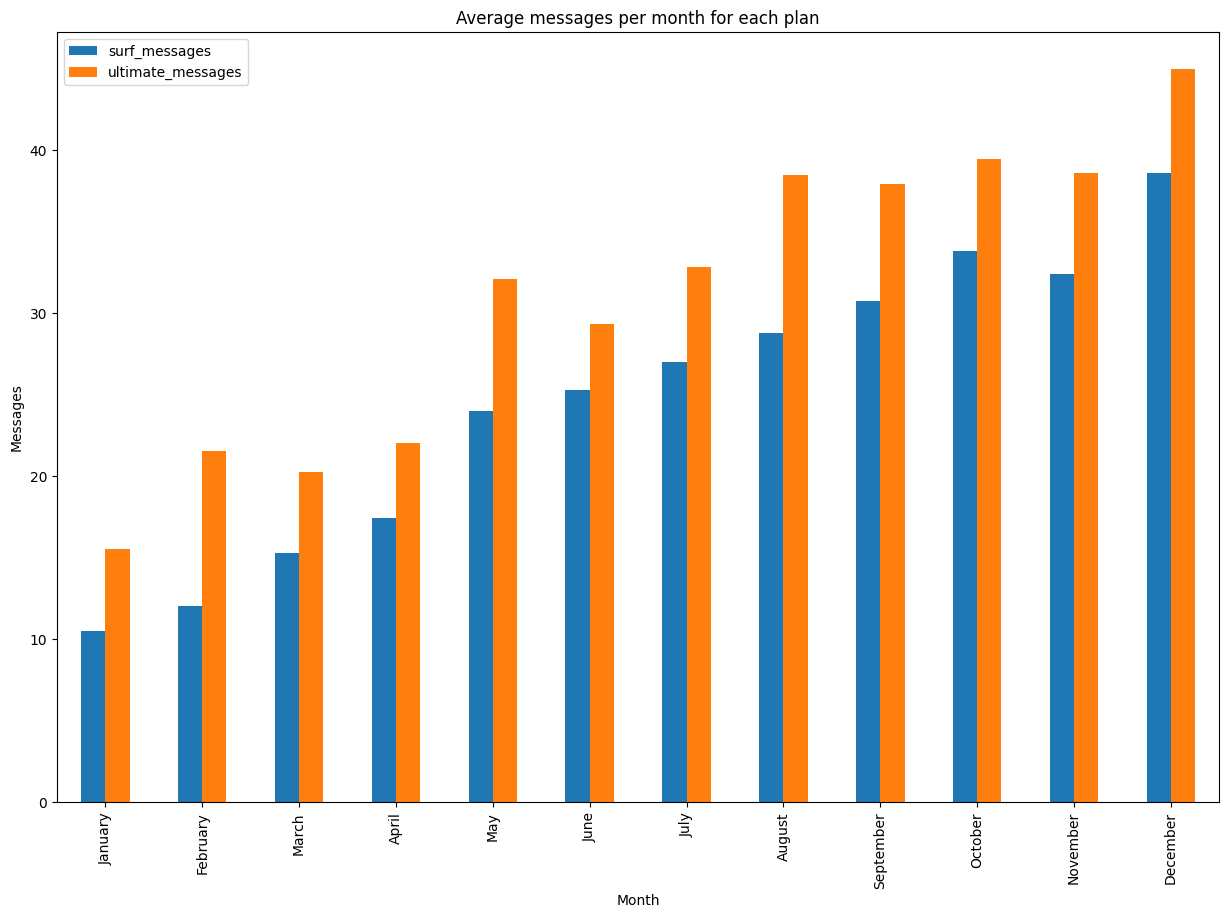

In [36]:
# Compare the number of messages users of each plan tend to send each month

# Get the data for the surf plan 
surf_messages = round(merged_data[merged_data['plan_name'] == 'surf'].groupby('month')['messages'].mean(), 2)

# Get the data for the ultimate plan
ultimate_messages = round(merged_data[merged_data['plan_name'] == 'ultimate'].groupby('month')['messages'].mean(), 2)

# Merge the data 
merged_messages = surf_messages.to_frame().merge(right=ultimate_messages.to_frame(), on = 'month', how = 'outer')

# rename messages_x and messages_y to surf_messages and ultimate_messages
merged_messages.columns = ['surf_messages', 'ultimate_messages']

# sort the index by the chronologically order of months
merged_messages.index = pd.CategoricalIndex(merged_messages.index, categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
merged_messages.sort_index(inplace=True)



# Plot the bar plot
merged_messages.plot(kind = 'bar', figsize = (15, 10))
plt.title('Average messages per month for each plan')
plt.xlabel('Month')
plt.ylabel('Messages')
plt.show()


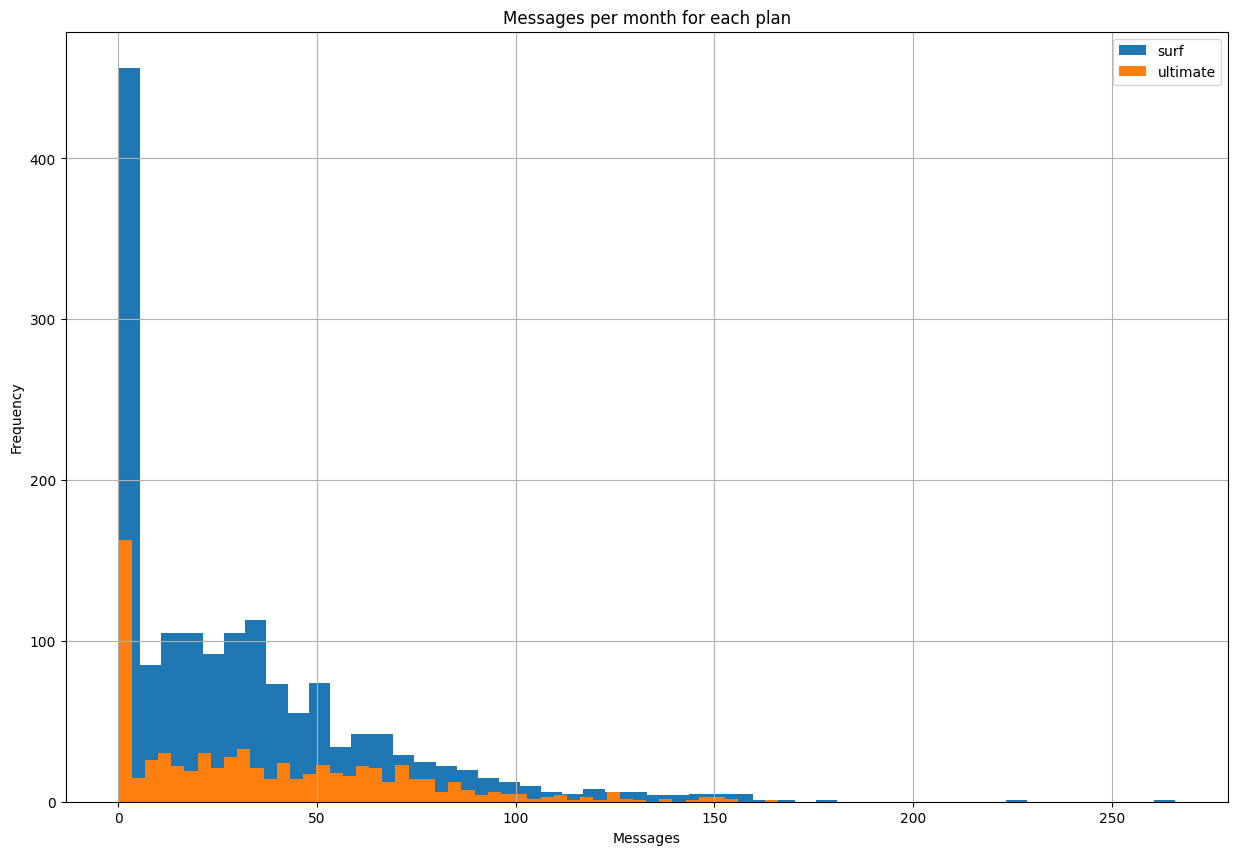

In [37]:
# Compare the amount of messages sent by users per plan

# Get the data for the surf plan and plot the histogram
surf_data = merged_data[merged_data['plan_name'] == 'surf']['messages'].hist(bins=50, figsize = (15, 10), label = 'surf')

# Get the data for the ultimate plan and plot the histogram

ultimate_data = merged_data[merged_data['plan_name'] == 'ultimate']['messages'].hist(bins=50, figsize = (15, 10), label = 'ultimate')

# Set the title and labels
plt.title('Messages per month for each plan')
plt.xlabel('Messages')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [38]:
# Find the mean and the variance of the monthly messages sent

# Get the data for the surf plan
surf_data_messages = merged_data[merged_data['plan_name'] == 'surf'].groupby('user_id')['messages'].mean()

# Get the data for the ultimate plan
ultimate_data_messages = merged_data[merged_data['plan_name'] == 'ultimate'].groupby('user_id')['messages'].mean()

# Calculate the mean, variance, and standard deviation for the surf plan
surf_mean_messages = surf_data_messages.mean()
surf_var_messages = surf_data_messages.var()
surf_std_messages = np.std(surf_data_messages)

# Calculate the mean, variance, and standard deviation for the ultimate plan
ultimate_mean_messages = ultimate_data_messages.mean()
ultimate_var_messages = ultimate_data_messages.var()
ultimate_std_messages = np.std(ultimate_data_messages)

# Print the results
print(f'Mean for the surf plan: {round(surf_mean_messages,2)}')
print(f'Variance for the surf plan: {round(surf_var_messages,2)}')
print(f'Standard deviation for the surf plan: {round(surf_std_messages,2)}')
print(f'Mean for the ultimate plan: {round(ultimate_mean_messages,2)}')
print(f'Variance for the ultimate plan: {round(ultimate_var_messages,2)}')
print(f'Standard deviation for the ultimate plan: {round(ultimate_std_messages,2)}')

Mean for the surf plan: 32.41
Variance for the surf plan: 962.1
Standard deviation for the surf plan: 30.97
Mean for the ultimate plan: 38.47
Variance for the ultimate plan: 1084.21
Standard deviation for the ultimate plan: 32.82


The average number of messages are about 33 for the clients with the Surf plan and those under the Ultimate plan is 39 messages. Standard deviation are relatively the same with 31 or 32. We do see that there are a decent amount of clients in the Surf group that exceed 50 messages a month that are prepaid, This leads to extra revenue from those clients that exceed those 50 prepaid messages.

### Internet

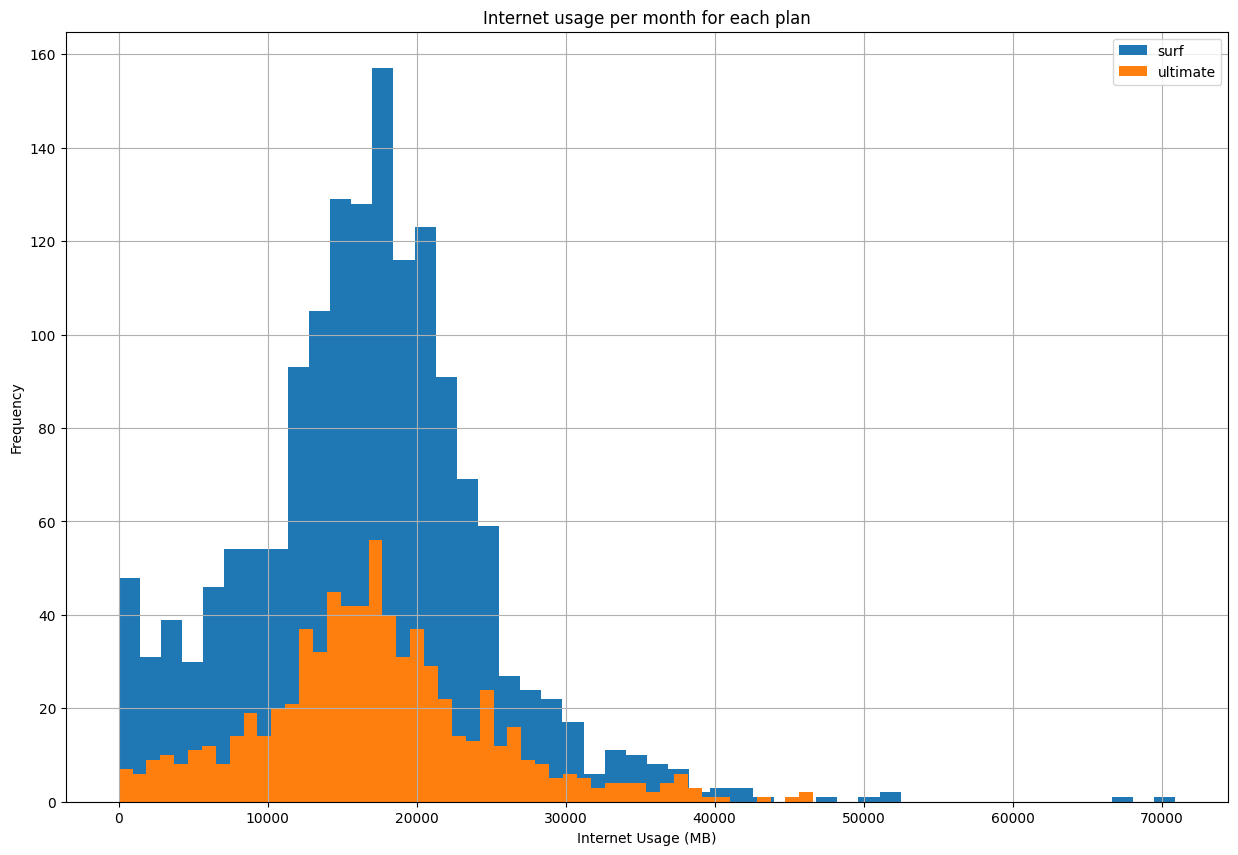

In [39]:
# Compare the amount of internet traffic consumed by users per plan

# Get the data for the surf plan and plot the histogram
surf_data = merged_data[merged_data['plan_name'] == 'surf']['mb_used'].hist(bins=50, figsize = (15, 10), label = 'surf')

# Get the data for the ultimate plan and plot the histogram
ultimate_data = merged_data[merged_data['plan_name'] == 'ultimate']['mb_used'].hist(bins=50, figsize = (15, 10), label = 'ultimate')

# Set the title and labels
plt.title('Internet usage per month for each plan')
plt.xlabel('Internet Usage (MB)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [40]:
# Calculate the mean and the variance of the monthly internet usage
# Get the data for the surf plan
surf_data_internet = merged_data[merged_data['plan_name'] == 'surf'].groupby('user_id')['mb_used'].mean()

# Get the data for the ultimate plan
ultimate_data_internet = merged_data[merged_data['plan_name'] == 'ultimate'].groupby('user_id')['mb_used'].mean()

# Calculate the mean, variance, and standard deviation for the surf plan
surf_mean_internet = surf_data_internet.mean()/1000
surf_var_internet = surf_data_internet.var()/(1000**2)
surf_std_internet = np.std(surf_data_internet)/1000

# Calculate the mean, variance, and standard deviation for the ultimate plan
ultimate_mean_internet = ultimate_data_internet.mean()/1000
ultimate_var_internet = ultimate_data_internet.var()/(1000**2)
ultimate_std_internet = np.std(ultimate_data_internet)/1000


# Print the results
print(f'Mean for the surf plan: {round(surf_mean_internet,2)} gb')
print(f'Variance for the surf plan: {round(surf_var_internet,2)} gb')
print(f'Standard deviation for the surf plan: {round(surf_std_internet,2)} gb')
print(f'Mean for the ultimate plan: {round(ultimate_mean_internet,2)} gb')
print(f'Variance for the ultimate plan: {round(ultimate_var_internet,2)} gb')
print(f'Standard deviation for the ultimate plan: {round(ultimate_std_internet,2)} gb')

Mean for the surf plan: 15.87 gb
Variance for the surf plan: 38.76 gb
Standard deviation for the surf plan: 6.22 gb
Mean for the ultimate plan: 16.04 gb
Variance for the ultimate plan: 34.94 gb
Standard deviation for the ultimate plan: 5.89 gb


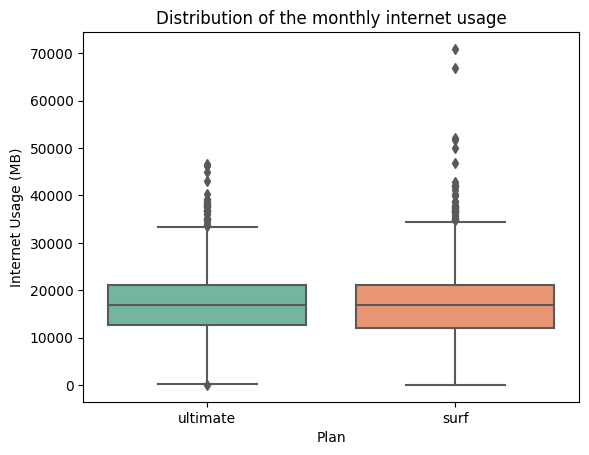

In [41]:
# Plot a boxplot to show the distribution of the monthly internet usage
sns.boxplot(x = 'plan_name', y = 'mb_used', data = merged_data, palette = 'Set2')
plt.title('Distribution of the monthly internet usage')
plt.xlabel('Plan')
plt.ylabel('Internet Usage (MB)')
plt.show()

Looking at the information, it looks like the average monthly internet usage for clients in the Surf plan exceed the plan's limit of 15GB, which leads to additional fee to monthly usage. Those in the Ultimate plan mostly stay within their 30GB range in internet data.

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

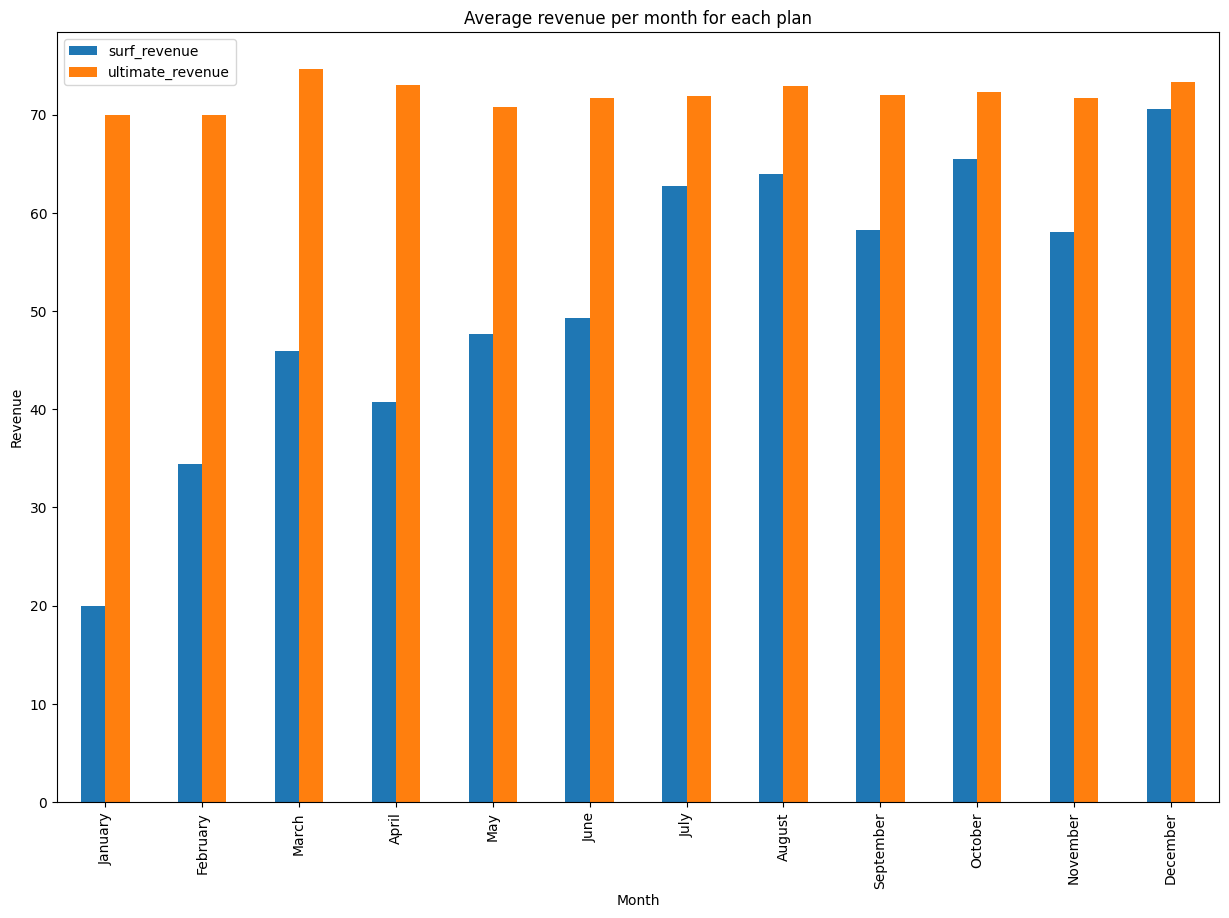

In [42]:
# Compare the revenue from users of each plan

# Get the data for the surf plan
surf_revenue = round(merged_data[merged_data['plan_name'] == 'surf'].groupby('month')['revenue'].mean(), 2)

# Get the data for the ultimate plan
ultimate_revenue = round(merged_data[merged_data['plan_name'] == 'ultimate'].groupby('month')['revenue'].mean(), 2)

# Merge the data
merged_revenue = surf_revenue.to_frame().merge(right=ultimate_revenue.to_frame(), on = 'month', how = 'outer')

# rename revenue_x and revenue_y to surf_revenue and ultimate_revenue
merged_revenue.columns = ['surf_revenue', 'ultimate_revenue']

# sort the index by the chronologically order of months
merged_revenue.index = pd.CategoricalIndex(merged_revenue.index, categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
merged_revenue.sort_index(inplace=True)

# Plot the bar plot
merged_revenue.plot(kind = 'bar', figsize = (15, 10))
plt.title('Average revenue per month for each plan')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

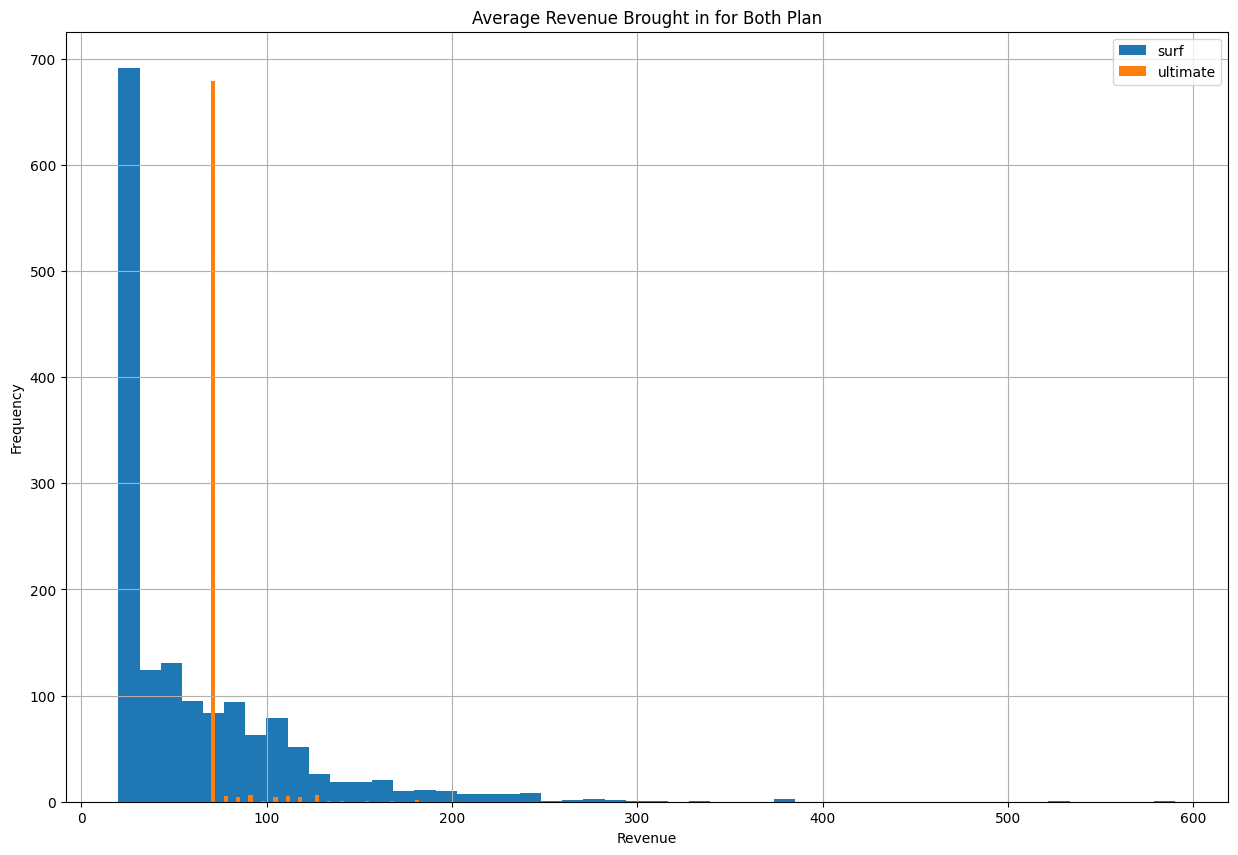

In [43]:
# Compare the amount of messages sent by users per plan

# Get the data for the surf plan and plot the histogram
surf_data = merged_data[merged_data['plan_name'] == 'surf']['revenue'].hist(bins=50, figsize = (15, 10), label = 'surf')

# Get the data for the ultimate plan and plot the histogram

ultimate_data = merged_data[merged_data['plan_name'] == 'ultimate']['revenue'].hist(bins=50, figsize = (15, 10), label = 'ultimate')

# Set the title and labels
plt.title('Average Revenue Brought in for Both Plan')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [44]:
# Calculate the mean and the variance of the monthly revenue

# Get the data for the surf plan
surf_data_revenue = merged_data[merged_data['plan_name'] == 'surf'].groupby('user_id')['revenue'].mean()

# Get the data for the ultimate plan
ultimate_data_revenue = merged_data[merged_data['plan_name'] == 'ultimate'].groupby('user_id')['revenue'].mean()

# Calculate the mean, variance, and standard deviation for the surf plan
surf_mean_revenue = surf_data_revenue.mean()
surf_var_revenue = surf_data_revenue.var()
surf_std_revenue = surf_data_revenue.std()


# Calculate the mean, variance, and standard deviation for the ultimate plan
ultimate_mean_revenue = ultimate_data_revenue.mean()
ultimate_var_revenue = ultimate_data_revenue.var()
ultimate_std_revenue = ultimate_data_revenue.std()


# Print the results
print(f'Mean for the surf plan: {round(surf_mean_revenue,2)}')
print(f'Variance for the surf plan: {round(surf_var_revenue,2)}')
print(f'Standard deviation for the surf plan: {round(surf_std_revenue,2)}')
print(f'Mean for the ultimate plan: {round(ultimate_mean_revenue,2)}')
print(f'Variance for the ultimate plan: {round(ultimate_var_revenue,2)}')
print(f'Standard deviation for the ultimate plan: {round(ultimate_std_revenue,2)}')

Mean for the surf plan: 58.19
Variance for the surf plan: 1897.91
Standard deviation for the surf plan: 43.57
Mean for the ultimate plan: 71.82
Variance for the ultimate plan: 55.13
Standard deviation for the ultimate plan: 7.42


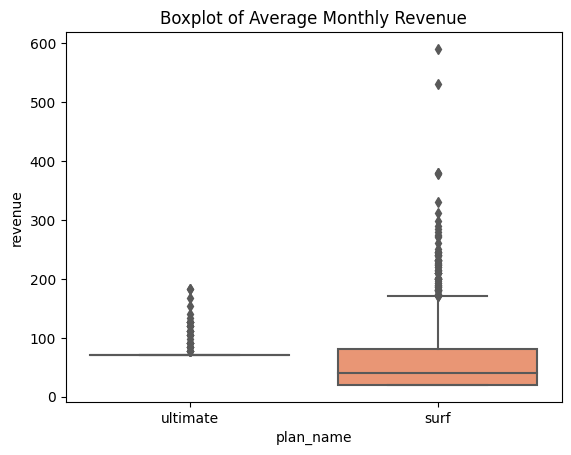

In [45]:
# Plot a boxplot to visualize the distribution of the monthly revenue
sns.boxplot(x = 'plan_name', y = 'revenue', data = merged_data, palette = 'Set2')
plt.title('Boxplot of Average Monthly Revenue')
plt.show()

Looking at the above boxplot, the Ultimate plan brings in more revenue with its higher monthly fee and mainly stay at 70 USD. There are a good portion of clients that are in the Surf plan that pay more than the standard 20 USD monthly fee. The data on the Surf plan may indicate room for Megaline to capitalize on this to bring in more revenue.

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [46]:
# Test the hypotheses

# Obtain the desired data slices
surf_data = merged_data[merged_data['plan_name'] == 'surf'].groupby('user_id')['revenue'].mean()
ultimate_data = merged_data[merged_data['plan_name'] == 'ultimate'].groupby('user_id')['revenue'].mean()

# The alpha value, or statistical significance, will be 5%
alpha = 0.05

# Calculate the result using the t-test
# equal_var will be set to false since we know that the variance is not equal
results = st.ttest_ind(surf_data, ultimate_data, equal_var=False)

# Print the results
print('p-value', round(results.pvalue,7))

# Determine if we can or cannot reject the null hypothesis and print the result
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value 1e-07
We reject the null hypothesis


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [47]:
# Test the hypotheses

# Obtain the desired data slics
df_with_location = merged_data.merge(right=users, on='user_id')
df_NY_NJ = df_with_location.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
df_other_regions = df_with_location.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')

# Calculate the average monthly revenue collected from each user in each data slice
df_NY_NJ = df_NY_NJ.groupby('user_id')['revenue'].mean()
df_other_regions = df_other_regions.groupby('user_id')['revenue'].mean()

# Set the alpha value to 0.05
alpha = 0.05

# Run the t-test, pass equal_var=True
results = st.ttest_ind(df_NY_NJ, df_other_regions, equal_var=True)

# Print the p-value results
print('p-value', results.pvalue)

# Determine if we can or cannot reject the null hypothesis and print the result
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value 0.48043818838129104
We can't reject the null hypothesis


## General conclusion

The tests that were constructed pointed out the hypothesis that the average monthly revenue for clients plan were equal to each other. However, we were not able reject the hypothesis that the average monthly revenue for clintes that were in the NY-NJ-PA areas were different than the average monthly revenue for the clients for other regions. 
Looking at the data and my own previous obervations, it looks like the Surf plan has a much greater number of clients and the average amount of monthly revenue that comes from the Surf plan is very significant and shows opportunity to increase revenue that can be brought in through increased monthly fees or penalty fees. In the Ultimate plan those clients mainly stayed within their internet usage and there are fewer clients in that plan versus the amount of clients in the Surf plan. Would advise focusing bringing clients into Surf plan more in order to produce more revenue in the future.